
## <font color=red> You should not import any new libraries. Your code should run with python=3.x</font>

- Your solutions will be auto-graded. Hence we request you to follow the instructions.
- Modify the code only between 
```
## TODO
## END TODO
```
- In addition to above changes, you can play with arguments to the functions for generating plots
- We will run the auto grading scripts with private test data

In [30]:
import numpy as np
from matplotlib import pyplot as plt
import math

# KMeans Algorithm

In [31]:
class Kmeans:
    """
    Implementing Kmeans algorithm.

    You may choose to define additional helper function within this class, however don't change the protype of `fit` and `predict` classes.   
    """

    def __init__(self, n_clusters, random_state):
        """
        Implement of kMeans algorithm

        Args:
        n_clusters: int - no. of clusters
        random_state: int - changing this should change initial cluster centers
        """

        self.n_clusters = n_clusters
        self.random_state = random_state
        self.cluster_centers = np.zeros((n_clusters, 2))

    
    def fit(self, X):
        """
        Implement of kMeans algorithm and stores cluster centers as class object

        Args:
        X : numpy array of shape (n_samples, 2)
        
        Returns:
        Nothing
        """
        ## TODO
        n_samples = X.shape[0]
        np.random.seed(120)
        # np.random.seed(5122)
        self.cluster_centers = X[np.random.permutation(n_samples)[:self.n_clusters], :]

        for _ in range(5000):
          centers = self.cluster_centers
          group = [self.predict(X[i,:]) for i in range(X.shape[0])]            
          for i in range(self.n_clusters):
            group_id = (group == i)
            if np.sum(group_id) > 0:
              g_sum = np.sum(X[group_id], axis=0)
              g_num = np.sum(group_id)
              self.cluster_centers[i] = g_sum /g_num
          precision = (np.linalg.norm(self.cluster_centers - centers, axis=1))
          precision = np.mean(precision)
          if precision < 1e-9:
            break

        ## END TODO
    
    def predict(self, X):
        """
        Uses the stored cluster centers from fit to predict labels. 
        Args:
        X : numpy array of shape (n_samples, 2)
        
        Returns:
        Y: Labels for each of the data point in X. np
        """
        Y = None
        ## TODO
        Y = np.zeros((X.shape[0],))
        for i in range(X.shape[0]):
          max_d, xi = 1e9, -1
          for k in range(self.n_clusters):
            distance  = np.linalg.norm(self.cluster_centers[k] - X[i])
            if distance < max_d:
              xi, max_d = k, distance  
          Y[i] = xi

        ## END TODO
        assert Y.shape == (X.shape[0],), "Return Y in expected format"
        return Y

## LOAD DATA 1

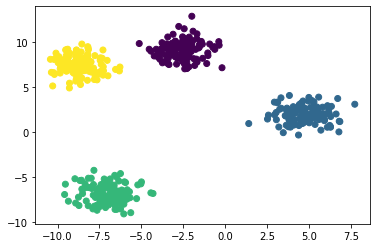

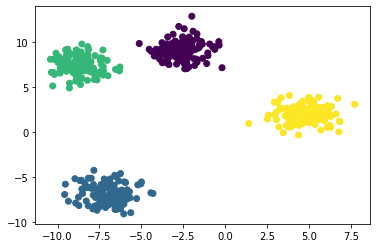

In [26]:
X = np.load('./data/train_X_1.npy')
Y = np.array([np.load('./data/train_Y_1.npy')]).T
Y = np.squeeze(Y)

plt.scatter(X[:,0],X[:,1],c=Y)
plt.figure()

km = Kmeans(4,123)
km.fit(X)
y_pred = km.predict(X)
plt.scatter(X[:,0],X[:,1],c=y_pred)

In [ ]:
# print(X)
# print(Y)
# print(X.shape)
# print(Y.shape)

## LOAD DATA 2

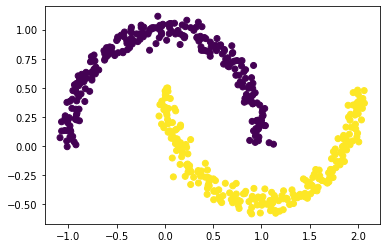

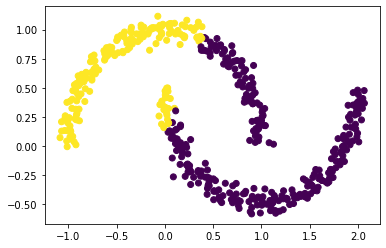

In [27]:
X = np.load('./data/train_X_2.npy')
Y = np.array([np.load('./data/train_Y_2.npy')]).T
Y = np.squeeze(Y)

plt.scatter(X[:,0],X[:,1],c=Y)
plt.figure()

km = Kmeans(2,123)
km.fit(X)
# self.random_state
y_pred = km.predict(X)
plt.scatter(X[:,0],X[:,1],c=y_pred)

In [ ]:
# print(X.shape)
# print(Y.shape)

## LOAD DATA 3

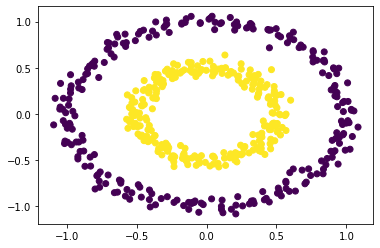

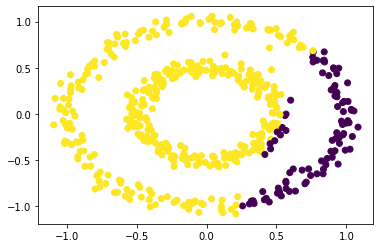

In [28]:
X = np.load('./data/train_X_3.npy')
Y = np.array([np.load('./data/train_Y_3.npy')]).T
Y = np.squeeze(Y)

plt.scatter(X[:,0],X[:,1],c=Y)
plt.figure()

km = Kmeans(2,123)
km.fit(X)
y_pred = km.predict(X)
plt.scatter(X[:,0],X[:,1],c=y_pred)

In [ ]:
# print(X.shape)
# print(Y.shape)

# Simple Kernel Design

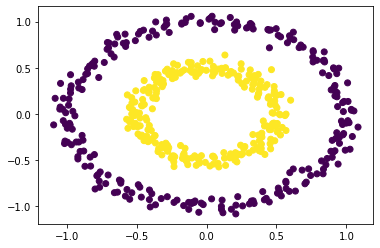

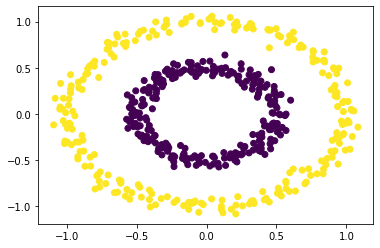

In [43]:
class Kmeans_Kernel:
    """
    Implementing Kmeans algorithm.

    You may choose to define additional helper function within this class, however don't change the protype of `fit` and `predict` classes.   
    """

    def __init__(self, n_clusters, random_state):
        """
        Implement of kMeans algorithm 

        Args:
        n_clusters: int - no. of clusters
        random_state: int - changing this should change initial cluster centers
        """

        self.n_clusters = n_clusters
        self.random_state = random_state
        #
        self.labels = None
        self.Ker = None

#-------------------------helper fn1
    def mykernel(self,X):
      n_samples = X.shape[0]
      result = np.zeros([n_samples,3])
      for i in range(X.shape[0]):
        result[i][1] = X[i][0]*X[i][0] 
        result[i][0] = X[i][0]*X[i][1]
        result[i][2] = X[i][1]*X[i][1]
      K = result @ result.T
      return K

    def make_zero_centered(self, X):
        """
        Returns a zero-centered concentric circles Dataset

        Args:
        X : numpy array of shape (n_samples, 2)
        
        Returns:
        X : numpy array of shape (n_samples, 2)
        """
        ## TODO
        xmean = np.mean(X, axis=0)
        X = X - xmean
        ## END TODO

        return X


#--------------------------------------------helper fn2 
    def helperFn(self,i,k):
      var1 = self.Ker[i,i]
      ind = (self.labels == k)
      ind = self.Ker[i].reshape(-1,1)[ind]
      var2 = 2.0*np.sum(ind)/ind.shape[0]
      indx = (self.labels == k)
      var3 = np.sum(self.Ker[indx @ indx.T])/self.Ker[indx @ indx.T].shape[0]
      return var3 - var2 + var1
    
    def fit(self, X):
        """
        Implement of kMeans algorithm along with using a suitable kernel and stores cluster centers as class object

        Args:
        X : numpy array of shape (n_samples, 2)
        
        Returns:
        Nothing
        """
        ## TODO
        n_samples = X.shape[0]
        np.random.seed(self.random_state)
        self.labels = np.random.randint(0,self.n_clusters,[n_samples,1])
        self.Ker = self.mykernel(X)
        
        for ptr in range(50):
            leb_pre = self.labels

            for i in range(X.shape[0]):
                curr_leb, maxd = 0, 1e10
                for j in range(self.n_clusters):
                    distance = self.helperFn(i,j)
                    if distance < maxd:
                        curr_leb, maxd  = j, distance
                leb_pre[i][0] = curr_leb


            if (self.labels == leb_pre).all():
                break
            self.labels = leb_pre

        ## END TODO
    
    def predict(self, X):
        """
        Uses the stored cluster centers from fit to predict labels using the kernel. 
        Args:
        X : numpy array of shape (n_samples, 2)
        
        Returns:
        Y: Labels for each of the data point in X.
        """
        ## TODO
        self.Ker = self.mykernel(X)
        Y = np.zeros([X.shape[0],])

        for i in range(X.shape[0]):
            curr_leb, maxd= 0, 1e10
            for j in range(self.n_clusters):
                distance = self.helperFn(i,j)
                if distance <maxd:
                    curr_leb, maxd  = j, distance
            Y[i] = curr_leb

        return Y


        ## END TODO

X = np.load('./data/train_X_3.npy')
Y = np.array([np.load('./data/train_Y_3.npy')]).T
Y = np.squeeze(Y)

plt.scatter(X[:,0],X[:,1],c=Y)
plt.figure()

km = Kmeans_Kernel(2,123)
km.fit(X)
y_pred = km.predict(X)
# print(y_pred)
plt.scatter(X[:,0],X[:,1],c=y_pred)